In [ ]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for speed of sound of hydrogen is collected.

In [1]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/speedOfSound/hydrogen-methane.csv')
expdata_df

,Fluid,Property,Dataset,#T(K),P(MPa),H2(mol fraction),rho(kg/m3),Z,Visc(Pa s),Thermal Conductivity (W/K/m),Run,JT,w (ms-1),T ( C)
0,H2-C1,w,Lozano2020,273.160,0.48093,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,439.555,0.010
1,H2-C1,w,Lozano2020,273.160,0.95352,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,437.751,0.010
2,H2-C1,w,Lozano2020,273.160,1.94476,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,434.234,0.010
3,H2-C1,w,Lozano2020,273.160,2.95350,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,431.122,0.010
4,H2-C1,w,Lozano2020,273.160,3.96005,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,428.587,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,H2-C1,w,Maurer2021,249.995,5.00885,0.046324,NaN,NaN,NaN,NaN,NaN,NaN,399.259,-23.155
274,H2-C1,w,Maurer2021,249.987,6.51553,0.046324,NaN,NaN,NaN,NaN,NaN,NaN,396.335,-23.163
275,H2-C1,w,Maurer2021,249.988,8.02696,0.046324,NaN,NaN,NaN,NaN,NaN,NaN,397.060,-23.162
276,H2-C1,w,Maurer2021,249.981,9.50802,0.046324,NaN,NaN,NaN,NaN,NaN,NaN,402.565,-23.169


<Figure size 640x480 with 0 Axes>

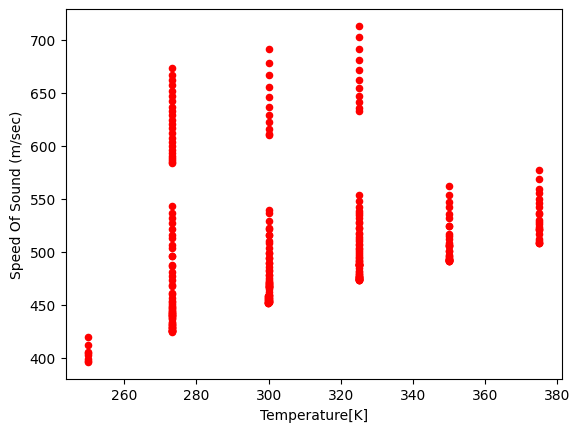

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='#T(K)', y='w (ms-1)', kind='scatter',ylabel='Speed Of Sound (m/sec)', xlabel='Temperature[K]',color='red')

plt.show()

In [11]:
referenceList = expdata_df['Dataset'].unique().tolist()
temperatureList = expdata_df['#T(K)'].unique().tolist()
pressureList = expdata_df['P(MPa)'].unique().tolist()
data = expdata_df.groupby(['#T(K)'])['P(MPa)'].count()
print('references ', referenceList)
print('temperature ', temperatureList)
print('pressure ', pressureList)
print('numer of data points for each temperature:')
print(data)

references  ['Lozano2020', 'Maurer2021']
temperature  [273.16, 300.0, 325.0, 350.0, 375.0, 349.99, 349.983, 349.978, 349.972, 349.961, 349.958, 349.951, 349.946, 349.94, 349.927, 325.011, 325.001, 324.992, 324.983, 324.974, 324.966, 324.958, 324.954, 299.959, 299.952, 299.946, 299.94, 299.936, 299.93, 299.921, 299.916, 299.909, 299.907, 273.126, 273.119, 273.115, 273.109, 273.104, 273.098, 273.091, 273.093, 250.017, 250.011, 250.003, 249.995, 249.987, 249.988, 249.981]
pressure  [0.48093, 0.95352, 1.94476, 2.9535, 3.96005, 4.96989, 5.97188, 6.99156, 7.99623, 8.98598, 9.98461, 10.98657, 11.80487, 12.49109, 13.27182, 14.00158, 14.79487, 15.50366, 16.31147, 17.04491, 17.83195, 18.5157, 19.32866, 19.9901, 0.49428, 0.98708, 1.97706, 2.98075, 3.98305, 4.98398, 5.97553, 6.988, 7.98929, 8.99078, 9.97066, 10.79807, 11.48854, 12.29517, 12.97841, 13.81568, 14.51408, 15.30042, 15.98613, 16.55422, 17.49614, 18.2956, 18.93451, 0.4811, 0.93346, 1.97447, 2.97418, 3.97804, 4.9781, 5.98867, 6.98692, 8.0

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations

In [13]:
data273 = expdata_df.loc[expdata_df['#T(K)'] == 350.00]
data273

,Fluid,Property,Dataset,#T(K),P(MPa),H2(mol fraction),rho(kg/m3),Z,Visc(Pa s),Thermal Conductivity (W/K/m),Run,JT,w (ms-1),T ( C)
71,H2-C1,w,Lozano2020,350.0,0.47315,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,493.060,76.85
72,H2-C1,w,Lozano2020,350.0,1.46058,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,492.495,76.85
73,H2-C1,w,Lozano2020,350.0,3.17997,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,492.204,76.85
74,H2-C1,w,Lozano2020,350.0,5.43052,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,493.408,76.85
75,H2-C1,w,Lozano2020,350.0,7.44669,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,496.149,76.85
76,H2-C1,w,Lozano2020,350.0,9.48960,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,500.664,76.85
77,H2-C1,w,Lozano2020,350.0,11.49720,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,506.859,76.85
78,H2-C1,w,Lozano2020,350.0,13.52754,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,514.987,76.85
79,H2-C1,w,Lozano2020,350.0,15.52198,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,524.663,76.85
80,H2-C1,w,Lozano2020,350.0,17.53712,0.050086,NaN,NaN,NaN,NaN,NaN,NaN,536.081,76.85


<Figure size 640x480 with 0 Axes>

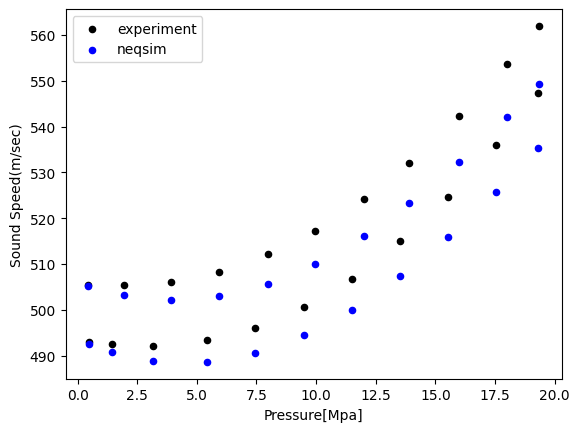

In [18]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('pr')
fluid1.addComponent('methane', 1.0-0.050086)
fluid1.addComponent('hydrogen', 0.050086)
fluid1.setTemperature(350.0, 'K')

def soundspeed(pres):
    #see methods: https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ViscosityOfFluids.ipynb#scrollTo=PzWrasHBWB3X
    #fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
    fluid1.setPressure(pres[0], 'MPa')
    fluidComposition(fluid1, [1.0-pres[1], pres[1]])
    try:
        TPflash(fluid1)
        fluid1.initProperties()
        return fluid1.getPhase('gas').getSoundSpeed()
    except:
        return float("nan")
pressures = data273['P(MPa)'].values.tolist()
molfrac = data273['H2(mol fraction)'].values.tolist()
data = zip(pressures, molfrac)
sounds_res = [soundspeed(P) for P in data]

dataWithExperiment = data273.assign(calc_soundspeed = sounds_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='P(MPa)', y='w (ms-1)', kind='scatter',ylabel='Sound Speed(m/sec)', xlabel='Pressure[MPa]',color='black')	
dataWithExperiment.plot(ax=plot1, x='P(MPa)', y='calc_soundspeed', kind='scatter',ylabel='Sound Speed(m/sec)', xlabel='Pressure[Mpa]',color='blue')	
plt.legend(['experiment', 'neqsim'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting